In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [2]:
# function to load shapfiles in as a geopandas object
def load_shape_file(filepath):
    """Loads the shape file desired to mask a grid.
    Args:
        filepath: Path to *.shp file
    """
    shpfile = gpd.read_file(filepath)
    return shpfile

In [3]:
#RGV_ecoreg= Rio Grande Valley Ecoregions
RGV_ecoreg = load_shape_file('C:\Bridgett\Bridgett\Introduction to Scientific computing\Everything\RGV_Ecoregions\RGV_Ecoregions.shp')
RGV_ecoreg.head() # .head gives you the first few lines, aka shapes

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry
0,1,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40311,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,380.00000,2700.0000,"POLYGON ((1653879 6904557, 1653869 6904557, 16..."
1,2,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40312,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,260.00000,1400.0000,"POLYGON ((1652969 6904537, 1652969 6904587, 16..."
2,3,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40375,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,291.84704,1682.2225,"POLYGON ((1655129 6903767.6097, 1655079 690377..."
3,4,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40447,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,1860.00000,36800.0000,"POLYGON ((1656909 6903857, 1656899 6903857, 16..."
4,5,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40472,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,160.00000,1300.0000,"POLYGON ((1656749 6903537, 1656749 6903517, 16..."


In [4]:
TMDT=[7004,7005]
TSG=[7103,7104,7105,7107]
TCT=[7204,7205,7207]
TF=[7402,7403,7404,7405,7406,7417,7407]
TR=[7602,7604,7605,7606,7607]
MNAMT=[9000,9007,9187,9600,9104,9106,9124,9107,9128,9116,9204]
AHRMT=[9304,9307,9410,9411,9317]
TCDW=[10004,10006,10017]
TSCP=[2206,2207]
TCSBTM=[5600,5605,5617,5606,5616]
RGDTWS=[7802,7804,7805]
TCB=[6100]
TCDCG=[6200,6306,6307]
SCPIW=[6507]
STSBTF=[6600,6610]
TL=[7305,7306,7307]
TPGRF=[7502]
TSL=[7700,7707]
TST=[6806]
CSTCFFW=[6402,6403,6405]
TCG=[6707]

In [5]:
df = []
Veg_ID = RGV_ecoreg['Veg_ID']

In [6]:
for i in Veg_ID:
    if i in TMDT:
        df.append('Tamaulipan Mixed Deciduous Thornscrub')
    elif i in TSG:
        df.append('Tamaulipan Savanna Grassland')
    elif i in TCT:
        df.append('Tamaulipan Calcareous Thornscrub')
    elif i in TF:
        df.append('Tamaulipan Floodplain')
    elif i in TR:
        df.append('Tamulipan Ramadero')
    elif i in MNAMT:
        df.append('Mainly Natural Azonal Mapped Types') 
    elif i in AHRMT:
        df.append('Agricultural and other Human-related Mapped Types')
    elif i in TCDW:
        df.append('Tamaulipan Closed Depression Wetland')
    elif i in TSCP:
        df.append('Texas Saline Coastal Prairie')
    elif i in TCSBTM:
        df.append('Texas Coast Salt and Brackish Tidal Marsh')
    elif i in RGDTWS:
        df.append('Rio Grande Delta Thorn Woodland and Shrubland')    
    elif i in TCB:
        df.append('Texas Coastal Beach')          
    elif i in TCDCG:
        df.append('Texas Coast Dune and Coastal Grassland') 
    elif i in SCPIW:
        df.append('Southeastern Coastal Plain Interdunal Wetland')        
    elif i in STSBTF:
        df.append('South Texas Salt and Brackish Tidal Flats')        
    elif i in TL:
        df.append('Tamaulipan Lomas')
    elif i in TPGRF:
        df.append('Tamaulipan Palm Grove Riparian Forest')
    elif i in TSL:
        df.append('Tamaulipan Saline Lake')        
    elif i in TST:
        df.append('Tamaulipan Saline Thornscrub')      
    elif i in CSTCFFW:
        df.append('Central and South Texas Coastal Fringe Forest and Woodland')
    elif i in TCG:
        df.append('Tamaulipan Caliche Grassland')
    else:
        break

In [7]:
RGV_ecoreg['Major_Ecoregion'] = df

In [8]:
df2 = []

In [9]:
for i in Veg_ID:
    if i in TMDT:
        df2.append(0)
    elif i in TSG:
        df2.append(1)
    elif i in TCT:
        df2.append(2)
    elif i in TF:
        df2.append(3)
    elif i in TR:
        df2.append(4)
    elif i in MNAMT:
        df2.append(5)
    elif i in AHRMT:
        df2.append(6)
    elif i in TCDW:
        df2.append(7)
    elif i in TSCP:
        df2.append(8)
    elif i in TCSBTM:
        df2.append(9)
    elif i in RGDTWS:
        df2.append(10)
    elif i in TCB:
        df2.append(11)
    elif i in TCDCG:
        df2.append(12)
    elif i in SCPIW:
        df2.append(13)
    elif i in STSBTF:
        df2.append(14)
    elif i in TL:
        df2.append(15)
    elif i in TPGRF:
        df2.append(16)
    elif i in TSL:
        df2.append(17)
    elif i in TST:
        df2.append(18)
    elif i in CSTCFFW:
        df2.append(19)
    elif i in TCG:
        df2.append(20)      
    else:
        break


In [10]:
RGV_ecoreg['Maj_ER'] = df2

In [11]:
df3=[]

In [12]:
#I want to create a list of numbers that correspond to the Veg_IDs.

#for i in Veg_ID:
#    if i == 7004:
#        df4.append(0)

for i in Veg_ID:
    if i == 7004:
        df3.append(0.1)
    elif i == 7005:
        df3.append(0.2)
    elif i == 7103:
        df3.append(1.1)
    elif i == 7104:
        df3.append(1.2)
    elif i == 7105:
        df3.append(1.3)
    elif i == 7107:
        df3.append(1.4)
    elif i == 7204:
        df3.append(2.1)
    elif i == 7205:
        df3.append(2.2)
    elif i == 7207:
        df3.append(2.3)
    elif i == 7402:
        df3.append(3.1)
    elif i == 7403:
        df3.append(3.2)
    elif i == 7404:
        df3.append(3.3)
    elif i == 7405:
        df3.append(3.4)
    elif i == 7406:
        df3.append(3.5)       
    elif i == 7602:
        df3.append(4.1)
    elif i == 7604:
        df3.append(4.2)
    elif i == 7605:
        df3.append(4.3)
    elif i == 7606:
        df3.append(4.4)
    elif i == 9000:
        df3.append(5.1)
    elif i == 9007:
        df3.append(5.2)
    elif i == 9104:
        df3.append(5.5)
    elif i == 9106:
        df3.append(5.6)
    elif i == 9124:
        df3.append(5.7)
    elif i == 9187:
        df3.append(5.3)
    elif i == 9304:
        df3.append(6.1)
    elif i == 9307:
        df3.append(6.2)
    elif i == 9410:
        df3.append(6.3)
    elif i == 9411:
        df3.append(6.4)
    elif i == 9600:
        df3.append(5.4)
    elif i == 10004:
        df3.append(7.1)
    elif i == 10006:
        df3.append(7.2)
    elif i == 10017:
        df3.append(7.3)
    elif i == 7417:
        df3.append(3.6)
    elif i == 2206:
        df3.append(8.1)   
    elif i == 2207:
        df3.append(8.2)
    elif i == 5600:
        df3.append(9.1)
    elif i == 5605:
        df3.append(9.2)
    elif i == 5617:
        df3.append(9.3)
    elif i == 6307:
        df3.append(12.3)
    elif i == 7407:
        df3.append(3.7)   
    elif i == 7802:
        df3.append(10.1)
    elif i == 7804:
        df3.append(10.2)
    elif i == 7805:
        df3.append(10.3)
    elif i == 9107:
        df3.append(5.8)
    elif i == 9128:
        df3.append(5.9)
    elif i == 9317:
        df3.append(6.5)
    elif i == 5606:
        df3.append(9.4)
    elif i == 5616:
        df3.append(9.5)
    elif i == 6100:
        df3.append(11.1)
    elif i == 6200:
        df3.append(12.1)
    elif i == 6306:
        df3.append(12.2)
    elif i == 6405:
        df3.append(19.3)
    elif i == 6507:
        df3.append(13.1)
    elif i == 6600:
        df3.append(14.1)
    elif i == 6610:
        df3.append(14.2)
    elif i == 7305:
        df3.append(15.1)
    elif i == 7306:
        df3.append(15.2)
    elif i == 7307:
        df3.append(15.3)
    elif i == 7502:
        df3.append(16.1)
    elif i == 7700:
        df3.append(17.1)
    elif i == 7707:
        df3.append(17.2)
    elif i == 9204:
        df3.append(5.11)
    elif i == 6806:
        df3.append(18.1)
    elif i == 7607:
        df3.append(4.5)
    elif i == 6402:
        df3.append(19.1)
    elif i == 6403:
        df3.append(19.2)
    elif i == 6707:
        df3.append(20.1)
    elif i == 9116:
        df3.append(5.01)
    else:
        break

In [13]:
RGV_ecoreg['Sub_ER'] = df3
RGV_ecoreg.tail(n=10)

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry,Major_Ecoregion,Maj_ER,Sub_ER
268960,268961,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,4804.657264,101363.203592,"POLYGON ((1684469 6920147.0001, 1684469 692013...",Agricultural and other Human-related Mapped Types,6,6.4
268961,268962,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,508.719023,5808.285643,"POLYGON ((1684639 6925007, 1684639 6924997, 16...",Agricultural and other Human-related Mapped Types,6,6.4
268962,268963,5605,Coastal: Sea Ox-eye Daisy Flats,11,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080800,580.000000,13900.000000,"POLYGON ((1755440 6914483, 1755440 6914473, 17...",Texas Coast Salt and Brackish Tidal Marsh,9,9.2
268963,268964,5617,Coastal: Salt and Brackish High Tidal Marsh,27,0,0,R150BY652TX,SALT MARSH PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,4066.640179,179933.064918,"POLYGON ((1762070 6915313, 1762070 6915293, 17...",Texas Coast Salt and Brackish Tidal Marsh,9,9.3
268964,268965,6600,South Texas: Wind Tidal Flats,1,0,0,R150BY651TX,SALT FLAT PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,1692.414009,23079.569882,"POLYGON ((1758870 6914803.0001, 1758870 691479...",South Texas Salt and Brackish Tidal Flats,14,14.1
268965,268966,7107,South Texas: Sandy Mesquite Savanna Grassland,15,0,0,R083CY463TX,LOAMY SAND PE 19-31,0,34d,Coastal Sand Plain,34,Western Gulf Coastal Plain,121102070008,8715.483683,586649.222118,"(POLYGON ((1696421 6964752.4355, 1696389.86960...",Tamaulipan Savanna Grassland,1,1.4
268966,268967,9307,Row Crops,9,0,0,R083CY480TX,SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,859.361519,15110.197319,"POLYGON ((1705419 6914631.1078, 1705419 691462...",Agricultural and other Human-related Mapped Types,6,6.2
268967,268968,9307,Row Crops,9,0,0,R083DY504TX,LAKEBED PE 19-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,597.590022,10608.125938,"POLYGON ((1724270 6914509.9858, 1724270 691450...",Agricultural and other Human-related Mapped Types,6,6.2
268968,268969,9307,Row Crops,9,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,778.370095,35481.894865,"POLYGON ((1732782 6914658, 1732782 6914638, 17...",Agricultural and other Human-related Mapped Types,6,6.2
268969,268970,9600,Open Water,21,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,3886.371293,328074.221869,"POLYGON ((1686069 6915037, 1686069 6915027, 16...",Mainly Natural Azonal Mapped Types,5,5.4


In [14]:
#group_names=['groupA', 'groupB', 'groupC']
#group_size=[12,11,30]

sum = 0

for MERn in np.arange(0,21):
    temp_sum = np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Maj_ER == MERn])
    print(temp_sum)
    sum = sum + temp_sum
    
print(sum)

618710590.5234846
2467283634.0686307
442216593.60378927
202253842.6212593
176501205.71520394
1821777320.1111965
3570055490.8441744
14993065.930600151
535730598.01641876
259509859.10961932
23215181.89602481
1637675.184440527
727464989.6193082
8874321.72110065
376455038.98037183
68358006.63592342
649159.5606464
13775125.11699649
159185608.99921954
107548892.23097286
16259767.161396649
11612455967.650776


In [15]:
Label=np.arange(0,21)
Area=np.array([618710590.5234846, 2467283634.0686307, 442216593.60378927, 202253842.6212593, 176501205.71520394, 1821777320.1111965, 3570055490.8441744, 14993065.930600151, 535730598.01641876, 259509859.10961932, 23215181.89602481, 1637675.184440527, 727464989.6193082, 8874321.72110065, 376455038.98037183, 68358006.63592342, 649159.5606464, 13775125.11699649, 159185608.99921954, 107548892.23097286, 16259767.161396649])


In [17]:
#Labels for Sub ecoregions are not consecutive numbers
#Create a list of their labels

Sub_ER=[0.1,0.2,1.1,1.2,1.3,1.4,2.1,2.2,2.3,3.1,3.2,3.3,3.4,3.5,4.1,4.2,4.3,4.4,5.1,5.2,5.5,5.6,5.7,5.3,6.1,6.2,6.3,6.4,5.4,7.1,7.2,7.3,3.6,8.1,8.2,9.1,9.2,9.3,12.3,3.7,10.1,10.2,10.3,5.8,5.9,6.5,9.4,9.5,11.1,12.1,12.2,19.3,13.1,14.1,14.2,15.1,15.2,15.3,16.1,17.1,17.2,5.11,18.1,4.5,19.1,19.2,20.1,5.01]


In [18]:
#Now I need to get the areas for each of the 64 subgroups
#The total sum of these must equal to the total sum od Maj_ER

sum1 = 0

for SERn in Sub_ER:
    temp_sum1 = np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == SERn])
    print(temp_sum1)
    sum1 = sum1 + temp_sum1
    
print(sum1)

403117081.3414676
215593509.18201685
90453376.2872941
1451511090.706595
262844126.88390356
662475040.1908376
331105032.5033702
71812425.28822668
39299135.81219241
57941271.329609394
10801429.84033888
54308250.664430484
12082469.646661151
46343499.59138941
21365115.777789153
64622047.11597763
14428014.55157777
76081628.26985942
45532567.217426434
22858092.339831553
2451315.16967957
2995576.2906827303
1497806.64140375
1569646004.4830456
26439743.637667872
2635799088.4889517
163497873.96353918
736733125.5420476
172256020.67993057
9022668.26594094
5922097.66465921
48300.0
18702658.01257751
14454218.17770271
521276379.83871603
26455755.91901072
140545330.43316013
86791434.58744286
714577943.7051466
2074263.53625248
21875898.00994634
1205899.17410209
133384.71197638
1540955.32210895
1084280.45046937
7585659.21196878
1228304.0036185689
4489034.166387061
1637675.184440527
12802650.203404143
84395.71075781
40823413.20326358
8874321.72110065
321225613.42347133
55229425.55690051
54476955.76658426

In [19]:
Sub_ER_Areas=np.array([403117081.3414676,215593509.18201685,90453376.2872941,1451511090.706595,262844126.88390356,662475040.1908376,331105032.5033702,71812425.28822668,39299135.81219241,57941271.329609394,10801429.84033888,54308250.664430484,12082469.646661151,46343499.59138941,21365115.777789153,64622047.11597763,14428014.55157777,76081628.26985942,45532567.217426434,22858092.339831553,2451315.16967957,2995576.2906827303,1497806.64140375,1569646004.4830456,26439743.637667872,2635799088.4889517,163497873.96353918,736733125.5420476,172256020.67993057,9022668.26594094,5922097.66465921,48300.0,18702658.01257751,14454218.17770271,521276379.83871603,26455755.91901072,140545330.43316013,86791434.58744286,714577943.7051466,2074263.53625248,21875898.00994634,1205899.17410209,133384.71197638,1540955.32210895,1084280.45046937,7585659.21196878,1228304.0036185689,4489034.166387061,1637675.184440527,12802650.203404143,84395.71075781,40823413.20326358,8874321.72110065,321225613.42347133,55229425.55690051,54476955.76658426,2142379.47728644,11738671.392052712,649159.5606464,7603799.803393611,6171325.31360288,1287346.7797249116,159185608.99921954,4400.0,66133288.92847626,592190.0992330165,16259767.161396649,627354.7368931101])

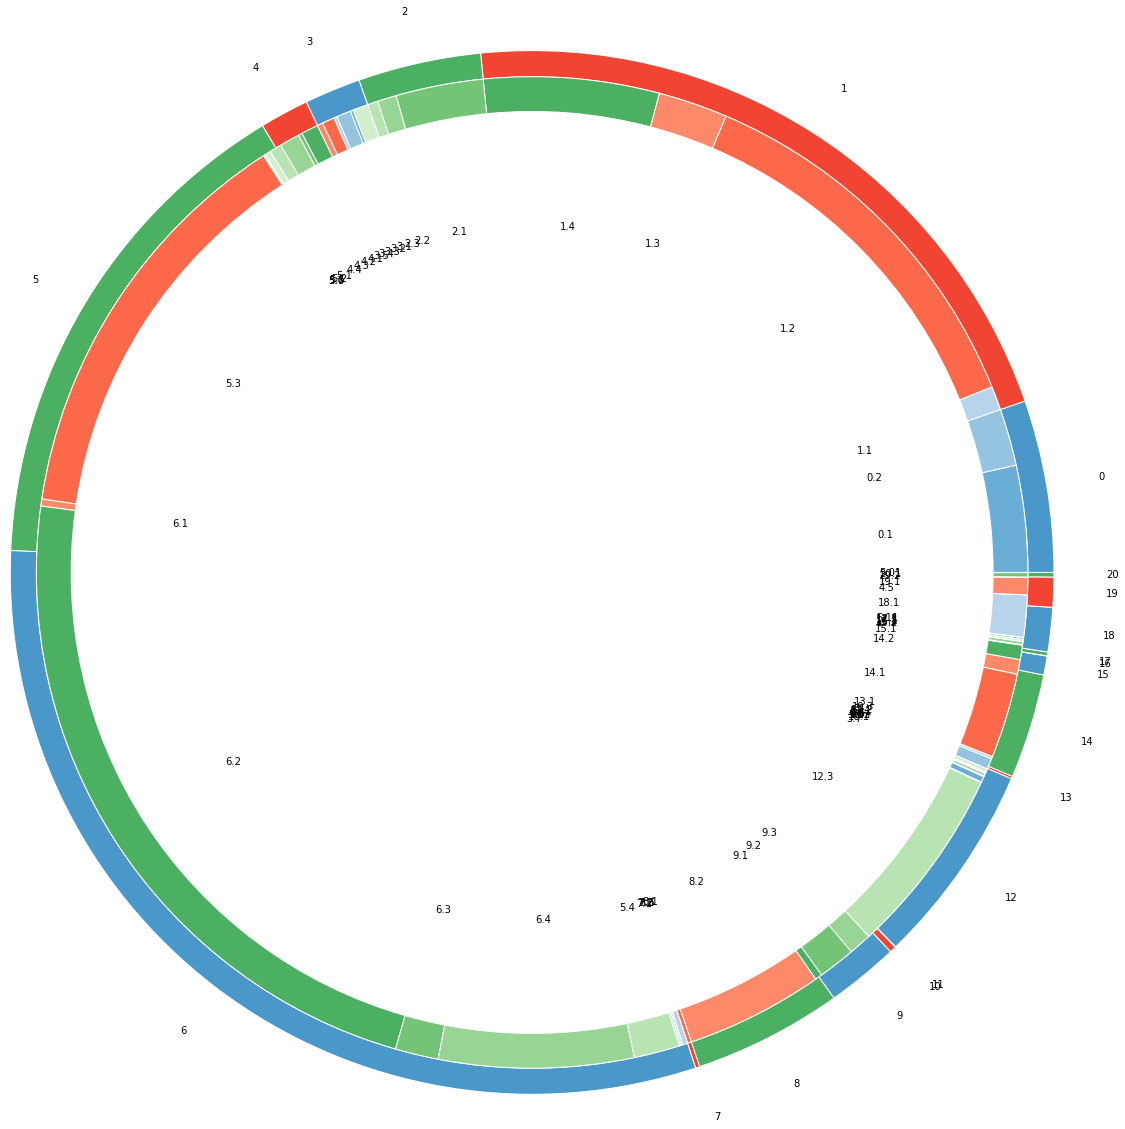

In [28]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Label
group_size=Area
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Areas
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=5.7, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

I need to show the areas as pecentages of the whole so it can be interpretated better.

In [ ]:
618710590.5234846 #0
2467283634.0686307
442216593.60378927
202253842.6212593
176501205.71520394
1821777320.1111965
3570055490.8441744
14993065.930600151
535730598.01641876
259509859.10961932
23215181.89602481
1637675.184440527
727464989.6193082
8874321.72110065
376455038.98037183
68358006.63592342
649159.5606464
13775125.11699649
159185608.99921954
107548892.23097286
16259767.161396649 #20
11612455967.650776 #Total Area

In [32]:
Maj_ER=np.arange(0,21)
Maj_ER_Areas=np.array([618710590.5234846, 2467283634.0686307, 442216593.60378927, 202253842.6212593, 176501205.71520394, 1821777320.1111965, 3570055490.8441744, 14993065.930600151, 535730598.01641876, 259509859.10961932, 23215181.89602481, 1637675.184440527, 727464989.6193082, 8874321.72110065, 376455038.98037183, 68358006.63592342, 649159.5606464, 13775125.11699649, 159185608.99921954, 107548892.23097286, 16259767.161396649])


In [34]:
Maj_ER_TArea=11612455967.650776

In [48]:
#I need to loop through each of the areas and divide it by the total area
#Then multipy by 100
#Append the Percentage to a new list - This list will go into the pie chart

Total_Percent=0
Maj_ER_Percents=[]

for Area in Maj_ER_Areas:
    Percent=(Area/Maj_ER_TArea)*100
    print(Percent)
    Maj_ER_Percents.append(Percent)
    Total_Percent=Total_Percent+Percent
    
print(Total_Percent) #This is to make sure the areas add up to 100%

5.3279908423080204
21.246871815418107
3.808122888350987
1.7416973910143116
1.5199300320870066
15.688131134242274
30.74332854987268
0.12911192922812245
4.6134133856681325
2.2347543003180808
0.19991621032360557
0.014102746128834899
6.264523126251956
0.07642071363561816
3.2418210241578165
0.5886610621073673
0.005590200405967406
0.11862370161290892
1.3708177619158983
0.926151130566829
0.1400200543854982
100.00000000000001


In [49]:
Maj_ER_Percents

[5.3279908423080204,
 21.246871815418107,
 3.808122888350987,
 1.7416973910143116,
 1.5199300320870066,
 15.688131134242274,
 30.74332854987268,
 0.12911192922812245,
 4.6134133856681325,
 2.2347543003180808,
 0.19991621032360557,
 0.014102746128834899,
 6.264523126251956,
 0.07642071363561816,
 3.2418210241578165,
 0.5886610621073673,
 0.005590200405967406,
 0.11862370161290892,
 1.3708177619158983,
 0.926151130566829,
 0.1400200543854982]

In [50]:
np.array([Maj_ER_Percents])

array([[5.32799084e+00, 2.12468718e+01, 3.80812289e+00, 1.74169739e+00,
        1.51993003e+00, 1.56881311e+01, 3.07433285e+01, 1.29111929e-01,
        4.61341339e+00, 2.23475430e+00, 1.99916210e-01, 1.41027461e-02,
        6.26452313e+00, 7.64207136e-02, 3.24182102e+00, 5.88661062e-01,
        5.59020041e-03, 1.18623702e-01, 1.37081776e+00, 9.26151131e-01,
        1.40020054e-01]])

In [ ]:
403117081.3414676 #0.1
215593509.18201685
90453376.2872941
1451511090.706595
262844126.88390356
662475040.1908376
331105032.5033702
71812425.28822668
39299135.81219241
57941271.329609394
10801429.84033888
54308250.664430484
12082469.646661151
46343499.59138941
21365115.777789153
64622047.11597763
14428014.55157777
76081628.26985942
45532567.217426434
22858092.339831553
2451315.16967957
2995576.2906827303
1497806.64140375
1569646004.4830456
26439743.637667872
2635799088.4889517
163497873.96353918
736733125.5420476
172256020.67993057
9022668.26594094
5922097.66465921
48300.0
18702658.01257751
14454218.17770271
521276379.83871603
26455755.91901072
140545330.43316013
86791434.58744286
714577943.7051466
2074263.53625248
21875898.00994634
1205899.17410209
133384.71197638
1540955.32210895
1084280.45046937
7585659.21196878
1228304.0036185689
4489034.166387061
1637675.184440527
12802650.203404143
84395.71075781
40823413.20326358
8874321.72110065
321225613.42347133
55229425.55690051
54476955.76658426
2142379.47728644
11738671.392052712
649159.5606464
7603799.803393611
6171325.31360288
1287346.7797249116
159185608.99921954
4400.0
66133288.92847626
592190.0992330165
16259767.161396649
627354.7368931101 #5.01
11612455967.650782 #Total


In [40]:
Sub_ER=[0.1,0.2,1.1,1.2,1.3,1.4,2.1,2.2,2.3,3.1,3.2,3.3,3.4,3.5,4.1,4.2,4.3,4.4,5.1,5.2,5.5,5.6,5.7,5.3,6.1,6.2,6.3,6.4,5.4,7.1,7.2,7.3,3.6,8.1,8.2,9.1,9.2,9.3,12.3,3.7,10.1,10.2,10.3,5.8,5.9,6.5,9.4,9.5,11.1,12.1,12.2,19.3,13.1,14.1,14.2,15.1,15.2,15.3,16.1,17.1,17.2,5.11,18.1,4.5,19.1,19.2,20.1,5.01]
Sub_ER_Areas=np.array([403117081.3414676,215593509.18201685,90453376.2872941,1451511090.706595,262844126.88390356,662475040.1908376,331105032.5033702,71812425.28822668,39299135.81219241,57941271.329609394,10801429.84033888,54308250.664430484,12082469.646661151,46343499.59138941,21365115.777789153,64622047.11597763,14428014.55157777,76081628.26985942,45532567.217426434,22858092.339831553,2451315.16967957,2995576.2906827303,1497806.64140375,1569646004.4830456,26439743.637667872,2635799088.4889517,163497873.96353918,736733125.5420476,172256020.67993057,9022668.26594094,5922097.66465921,48300.0,18702658.01257751,14454218.17770271,521276379.83871603,26455755.91901072,140545330.43316013,86791434.58744286,714577943.7051466,2074263.53625248,21875898.00994634,1205899.17410209,133384.71197638,1540955.32210895,1084280.45046937,7585659.21196878,1228304.0036185689,4489034.166387061,1637675.184440527,12802650.203404143,84395.71075781,40823413.20326358,8874321.72110065,321225613.42347133,55229425.55690051,54476955.76658426,2142379.47728644,11738671.392052712,649159.5606464,7603799.803393611,6171325.31360288,1287346.7797249116,159185608.99921954,4400.0,66133288.92847626,592190.0992330165,16259767.161396649,627354.7368931101])

In [39]:
Sub_ER_TArea=11612455967.650782

In [42]:
Total_Percent1=0
Sub_ER_Percents=[]

for Area in Sub_ER_Areas:
    Percent1=(Area/Sub_ER_TArea)*100
    print(Percent1)
    Sub_ER_Percents.append(Percent1)
    Total_Percent1=Total_Percent1+Percent1
    
print(Total_Percent1)

3.4714196761171343
1.8565711661908826
0.7789340733715003
12.499604689568852
2.263467156440614
5.704865896037127
2.851292038701726
0.6184085906398873
0.33842225900937206
0.49895794215296396
0.09301589491860116
0.467672392607721
0.1040474958985395
0.3990843945543483
0.18398447182324473
0.556489060505353
0.12424602161481074
0.6551725877954038
0.39210109682454836
0.19684115404620803
0.0211093602981857
0.02579623379436366
0.012898276174964552
13.516916738850615
0.22768433922438092
22.698033007243154
1.4079525848709422
6.34433514834752
1.4833728641020478
0.07769819141683462
0.05099780512543255
0.00041593268585517977
0.16105686914704476
0.12447167264158696
4.488941713026543
0.2278222280688033
1.2102980698026506
0.7473994719912889
6.153547067870663
0.01786240173509228
0.1883830437840779
0.010384531725772781
0.001148634813754768
0.013269848569515718
0.009337219047287564
0.06532347018667208
0.010577469632955316
0.03865706082238174
0.014102746128834893
0.11024928954795547
0.0007267688333364968
0.

In [43]:
Sub_ER_Percents

[3.4714196761171343,
 1.8565711661908826,
 0.7789340733715003,
 12.499604689568852,
 2.263467156440614,
 5.704865896037127,
 2.851292038701726,
 0.6184085906398873,
 0.33842225900937206,
 0.49895794215296396,
 0.09301589491860116,
 0.467672392607721,
 0.1040474958985395,
 0.3990843945543483,
 0.18398447182324473,
 0.556489060505353,
 0.12424602161481074,
 0.6551725877954038,
 0.39210109682454836,
 0.19684115404620803,
 0.0211093602981857,
 0.02579623379436366,
 0.012898276174964552,
 13.516916738850615,
 0.22768433922438092,
 22.698033007243154,
 1.4079525848709422,
 6.34433514834752,
 1.4833728641020478,
 0.07769819141683462,
 0.05099780512543255,
 0.00041593268585517977,
 0.16105686914704476,
 0.12447167264158696,
 4.488941713026543,
 0.2278222280688033,
 1.2102980698026506,
 0.7473994719912889,
 6.153547067870663,
 0.01786240173509228,
 0.1883830437840779,
 0.010384531725772781,
 0.001148634813754768,
 0.013269848569515718,
 0.009337219047287564,
 0.06532347018667208,
 0.01057746963

In [44]:
type(Sub_ER_Percents)

list

In [45]:
np.array([Sub_ER_Percents])

array([[3.47141968e+00, 1.85657117e+00, 7.78934073e-01, 1.24996047e+01,
        2.26346716e+00, 5.70486590e+00, 2.85129204e+00, 6.18408591e-01,
        3.38422259e-01, 4.98957942e-01, 9.30158949e-02, 4.67672393e-01,
        1.04047496e-01, 3.99084395e-01, 1.83984472e-01, 5.56489061e-01,
        1.24246022e-01, 6.55172588e-01, 3.92101097e-01, 1.96841154e-01,
        2.11093603e-02, 2.57962338e-02, 1.28982762e-02, 1.35169167e+01,
        2.27684339e-01, 2.26980330e+01, 1.40795258e+00, 6.34433515e+00,
        1.48337286e+00, 7.76981914e-02, 5.09978051e-02, 4.15932686e-04,
        1.61056869e-01, 1.24471673e-01, 4.48894171e+00, 2.27822228e-01,
        1.21029807e+00, 7.47399472e-01, 6.15354707e+00, 1.78624017e-02,
        1.88383044e-01, 1.03845317e-02, 1.14863481e-03, 1.32698486e-02,
        9.33721905e-03, 6.53234702e-02, 1.05774696e-02, 3.86570608e-02,
        1.41027461e-02, 1.10249290e-01, 7.26768833e-04, 3.51548487e-01,
        7.64207136e-02, 2.76621599e+00, 4.75605037e-01, 4.691251

In [51]:
Maj_ER_Percents

[5.3279908423080204,
 21.246871815418107,
 3.808122888350987,
 1.7416973910143116,
 1.5199300320870066,
 15.688131134242274,
 30.74332854987268,
 0.12911192922812245,
 4.6134133856681325,
 2.2347543003180808,
 0.19991621032360557,
 0.014102746128834899,
 6.264523126251956,
 0.07642071363561816,
 3.2418210241578165,
 0.5886610621073673,
 0.005590200405967406,
 0.11862370161290892,
 1.3708177619158983,
 0.926151130566829,
 0.1400200543854982]

In [107]:
plt.setp?


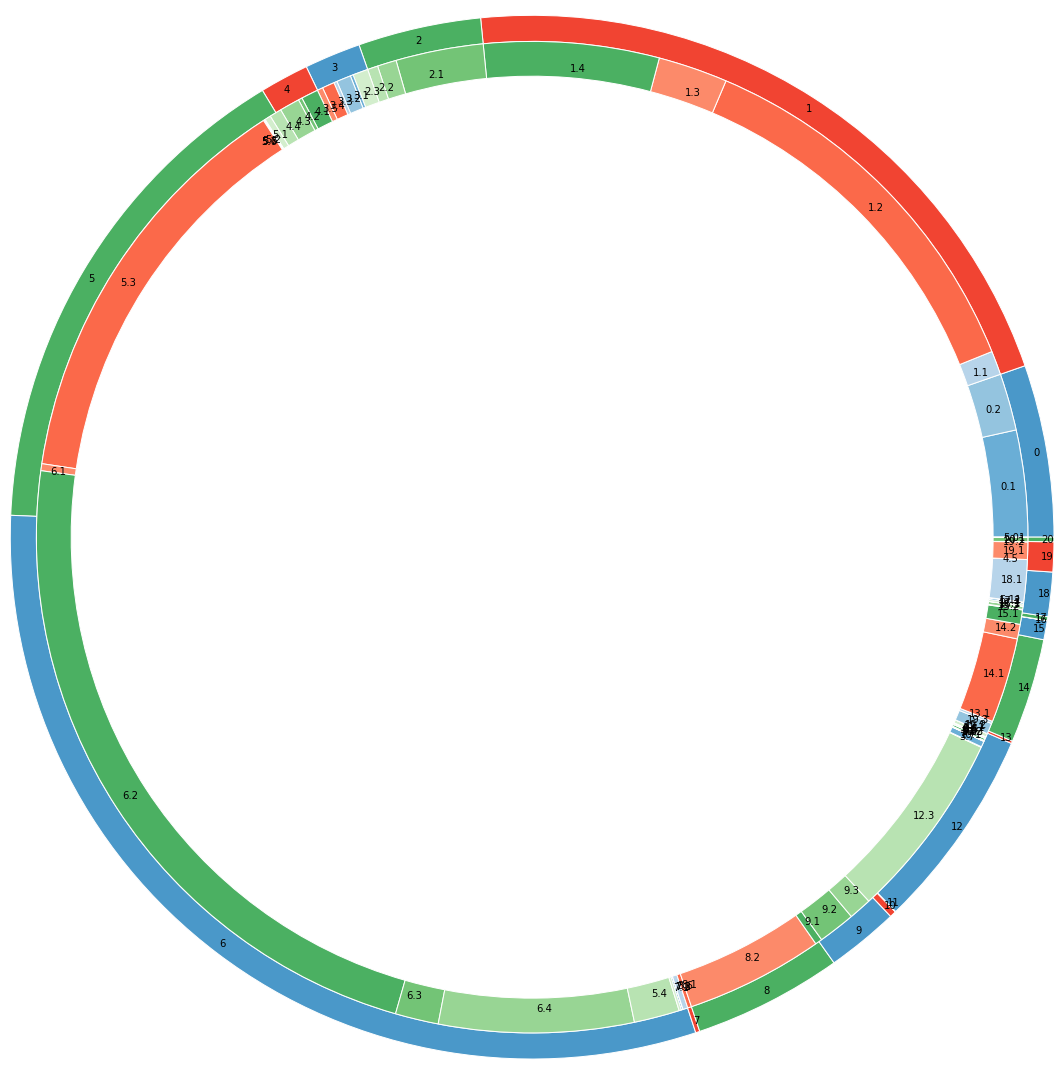

In [74]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Label
group_size=Maj_ER_Percents
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Percents
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6, labels=group_names, labeldistance=.975, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=5.7, labels=subgroup_names, labeldistance=.95, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

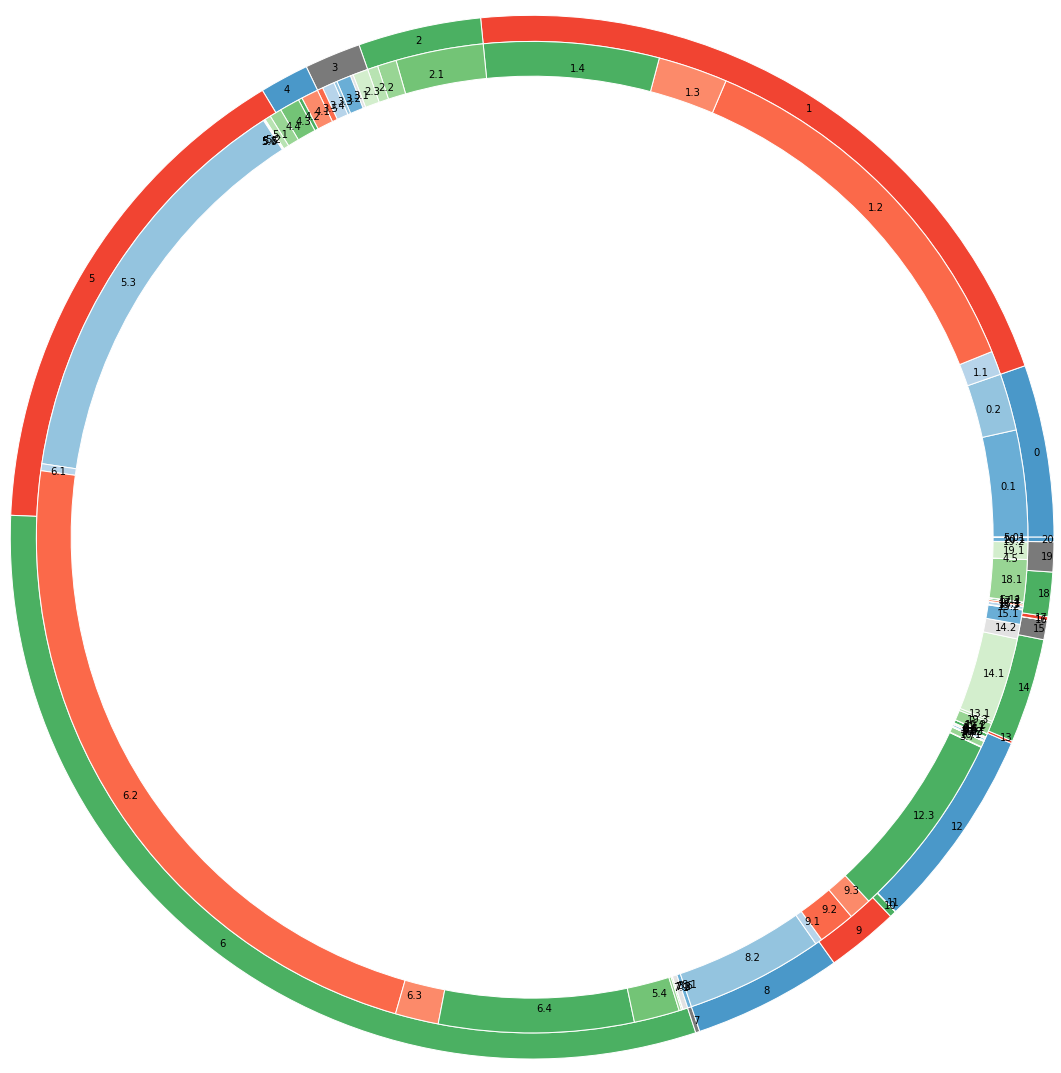

In [111]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Label
group_size=Maj_ER_Percents
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Percents
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6, labels=group_names, labeldistance=.975, colors=[a(0.6), b(0.6), c(0.6), d(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=5.7, labels=subgroup_names, labeldistance=.95, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2),d(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

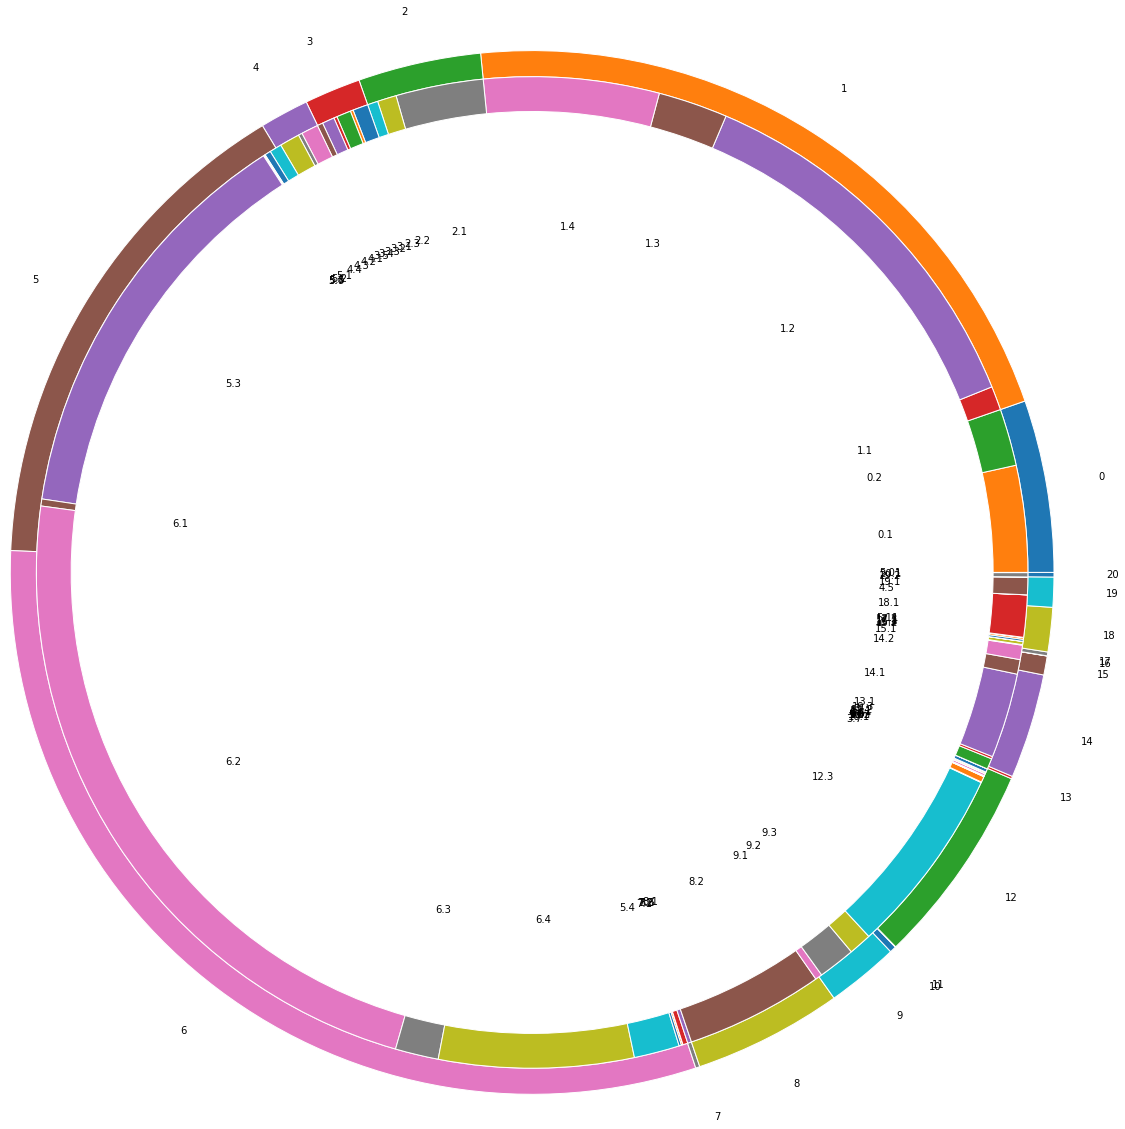

In [55]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Label
group_size=Maj_ER_Percents
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Percents
 

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6, labels=group_names,  )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=5.7, labels=subgroup_names, labeldistance=0.7)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()